In [205]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import bamboolib as bam

In [140]:
# Import model

expected_model_version = '1.0'
model_path = r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Five - Modeling\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [272]:
# Import data
ski_data = pd.read_csv(r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Four - Preprocessing and Training\data\ski_data_step4_features.csv')

In [273]:
# Define subset for plot data
dfPlot = ski_data.copy()

In [274]:
# Subset rows for plot data
dfPlot.dropna(subset=['AdultWeekend'], inplace=True)

In [275]:
# Subset cols for model prediction
x_features = dfPlot.set_index(['Name','Region','state']).copy()
x_bmr = x_features.loc['Big Mountain Resort',model.X_columns].copy()

In [276]:
# Define model plot parameters
modelPlotCount = 10
maxVals = x_features.max()
minVals = x_features.min()
plotInterval = (maxVals - minVals) / modelPlotCount
xColsCount = len(model.X_columns)

In [277]:
# Define empty DataFrames for iterating through model prediction scenarios
df = pd.DataFrame(index=[i for i in range(0,modelPlotCount)], columns = model.X_columns).copy()
x_modelVars = df.copy()
y_modelOutput = df.copy()

In [278]:
# Populate x_modelVars with features variables at each interval
x_modelVars.iloc[0,:] = minVals
for i in range(1,modelPlotCount):
    x_modelVars.iloc[i,:] = x_modelVars.iloc[i-1,:] + plotInterval

In [279]:
# Populate y_modelOutput with adjusted predictions for each value in x_modelVars
for col in range(0,xColsCount):
    for row in range(0,modelPlotCount):
        x_bmrMod = x_bmr.copy()
        x_bmrMod.iloc[0,col] = x_modelVars.iloc[row,col]
        y_modelOutput.iloc[row,col] = model.predict(x_bmrMod).item()
        #print('r' + str(row))
    print('c' + str(col))

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19
c20
c21
c22
c23
c24
c25
c26
c27
c28
c29
c30
c31


In [280]:
y_modelOutput

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,91.2184,90.1314,91.911,91.7842,91.7842,83.9388,90.763,91.0962,91.7842,91.4812,...,92.9332,91.7522,92.1392,97.953,92.7192,91.9592,90.8992,92.8282,91.9456,91.6154
1,91.5534,90.3174,91.9032,91.7842,91.7842,91.7012,91.2362,91.3382,91.6532,91.2492,...,92.8082,91.8212,92.2092,92.902,92.3472,92.4082,91.7652,92.0092,91.7602,91.7882
2,91.7952,91.3234,91.8192,91.9152,91.7842,91.7842,91.7842,92.1202,91.5632,91.7772,...,92.9702,91.7332,92.1252,92.68,92.0912,92.2032,92.0232,91.7942,91.6852,91.8182
3,91.7102,91.5282,91.7502,91.9152,92.6962,114.774,91.7822,92.1422,91.7622,91.7842,...,92.6192,91.8702,92.0242,91.7892,91.9392,92.1942,92.0622,91.9852,91.6962,91.7722
4,91.4452,91.5142,91.8322,91.9152,92.6962,118.109,91.9412,92.0902,91.7662,91.7962,...,91.7402,92.0022,91.7852,91.8132,91.7842,92.1942,92.1252,91.9852,91.8882,91.7582
5,91.7872,91.7392,91.7232,91.9152,92.6962,118.347,91.9412,92.0972,91.7722,91.7962,...,91.7842,92.1984,91.8542,91.8542,91.7952,92.2082,92.2332,91.9442,91.9082,91.7812
6,91.8092,97.6392,91.9692,92.0572,92.7632,122.356,91.9382,92.0982,91.7722,91.8512,...,91.8332,92.1964,91.8102,91.8802,91.8112,92.2042,93.5832,91.9012,92.0742,91.7902
7,92.8522,100.212,91.8292,92.3022,92.7632,122.805,91.7402,91.7842,91.7722,91.8362,...,91.9012,92.2054,91.8422,91.8742,91.8112,92.2392,93.5832,91.9012,92.0742,91.7952
8,92.9252,100.177,91.9062,92.3022,93.7282,123.422,91.6992,91.7842,91.7722,91.8362,...,91.9012,92.2954,91.8672,91.8742,91.8112,92.2392,93.5832,91.9012,92.0742,91.7842
9,93.1152,100.446,91.8022,92.3022,93.7282,123.422,91.6992,91.7842,91.7722,92.1942,...,91.9752,92.2934,91.7672,91.8652,91.8112,92.2392,93.5832,91.9012,92.0742,91.7842


In [268]:
plotFeatures = ['vertical_drop']

In [229]:
sPlotData = dfPlot.copy()

In [236]:
def setHue(state):
    if state == 'Montana': return 'Montana'
    elif state in ['Idaho','Wyoming','North Dakota','South Dakota']: return 'Adjacent State'
    else: return 'Other'

In [258]:
sPlotData['Hue'] = list(map(setHue,statesList))

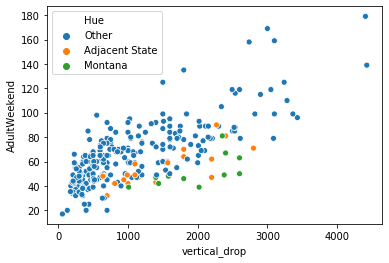

In [267]:
fig, ax = plt.subplots()
sb.scatterplot(x=plotFeatures, y='AdultWeekend', hue='Hue', data=sPlotData,legend='full', ax=ax)

In [310]:
ax2 = ax.twinx()

In [316]:
modelLine = []

In [317]:
modelLine = pd.DataFrame(index = x_modelVars.index)

In [318]:
modelLine['y'] = y_modelOutput[plotFeatures]

In [319]:
modelLine['x'] = x_modelVars[plotFeatures]

In [321]:
sb.lineplot(x='x', y='y', data=modelLine, ax=ax2)

DataError: No numeric types to aggregate

In [288]:
ax2 = ax.twinx()
sb.lineplot(x=x, y=y, data=modelLine, ax=ax2)
#legend='full', 

ValueError: If using all scalar values, you must pass an index

TypeError: regplot() got an unexpected keyword argument 'hue'

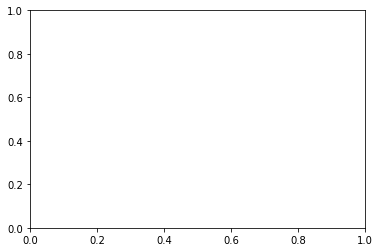

In [261]:
fig, ax = plt.subplots()
sb.regplot(x=plotFeatures, y=plotFeatures, color='r', data=sPlotData)  #, ax=ax)
plt.show()

In [209]:
sb.regplot(x='vertical_drop', y='AdultWeekend', data=dfPlot, ax=ax)

In [210]:
sb.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [57]:
fig, ax = plt.subplots()
sb.regplot(x=x, y=y, data=firm, ax=ax)
ax2 = ax.twinx()
sb.regplot(x='round', y='dead', data=firm, ax=ax2, color='r')
sb.plt.show()

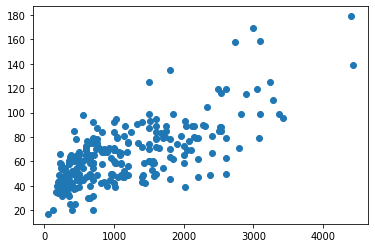

In [101]:
plt.scatter(x,y)

In [ ]:
# Get Big Mountain Resort Data, x_bmr:
dfPlotNames = dfPlot['Name']
dfPlot = dfPlot.T
dfPlot.columns = dfPlotNames
bmr = dfPlot.pop('Big Mountain Resort')
x_bmr = pd.DataFrame(bmr).T
x_bmr = x_bmr.set_index(['Name','Region','state'])
dfPlot = dfPlot.T

In [ ]:
# Divide y from x plot parameters
x_features = dfPlot
y_prices = pd.DataFrame(x_features.pop('AdultWeekend'))
y_bmrPrice = x_bmr.pop('AdultWeekend')

In [58]:
x_modelVars.loc[:,features]

,vertical_drop
0,60
1,103.65
2,147.3
3,190.95
4,234.6
...,...
95,4206.75
96,4250.4
97,4294.05
98,4337.7


In [59]:
dfGraph = pd.DataFrame(columns=features, index=x_modelVars.index)


In [62]:
dfGraph = x_modelVars.loc[:,features]

In [63]:
dfGraph

,vertical_drop
0,60
1,103.65
2,147.3
3,190.95
4,234.6
...,...
95,4206.75
96,4250.4
97,4294.05
98,4337.7


In [61]:
dfGraph.loc[features] = x_modelVars.loc[:,features]

KeyError: "None of [Index(['vertical_drop'], dtype='object')] are in the [index]"

In [45]:
dfGraph = dfGraph.reset_index()
dfGraph

,x,y,hue


In [ ]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)